# **Talbot-Lau Interferometer and Phase Contrast Image Acquisition**
X-ray phase contrast images are obtained using the Talbot-Lau interferometer. This interferometer consists of three gratings (G0, G1, and G2).

The first grating (G0) is placed just behind the X-ray source. Its function is to create multiple mutually coherent sources aligned perpendicularly to the grating bars. In this simulation, G0 is not considered, as it is not necessary; the simulation assumes a parallel and coherent beam from the start.

The second grating (G1) can be placed either before or after the object. In this simulation, G1 and the object are placed adjacent to each other, so there is no wavefront propagation between them; their transfer functions are simply multiplied. This grating is typically a phase-shifting grating introducing either a or phase shift. In the simulation, G1 is modeled as a silicon grating with a thickness that produces a 
phase shift.

The third grating (G2) enables the acquisition of phase contrast images. Due to the limited spatial resolution of the detector, the interference patterns generated by the propagation of the wavefront from G1 to the detector cannot be directly resolved. G2 is placed at the Talbot distance from G1, so that the self-image of G1 is formed at G2. If a 
phase grating is used as G1, the period of the image formed will be the same as that of G1, and therefore G2 will have the same period as G1 (assuming a plane wave). G2 is an absorption grating with negligible phase shift; in this simulation, it is modeled as a gold grating. G2 is moved perpendicular to the optical axis while intensity images are recorded by the detector placed immediately behind it.

As will be explained later, in order to retrieve the phase and attenuation information introduced by the object, a series of reference images must be acquired. These reference images are taken under the same conditions as the object images, but without the object, using only the gratings.

In the following code cells, you can simulate the acquisition of these images and recover the attenuation and phase introduced by the object.

Talbot distance (cm): 8.347838340973029
G2 period: 3.0
The magnification is: 1


phase steps:   0%|          | 0/10 [00:00<?, ?it/s]

Applying detector effects


phase steps:  10%|█         | 1/10 [00:07<01:05,  7.27s/it]

Applying detector effects


phase steps:  20%|██        | 2/10 [00:14<00:57,  7.21s/it]

Applying detector effects


phase steps:  30%|███       | 3/10 [00:21<00:50,  7.16s/it]

Applying detector effects


phase steps:  40%|████      | 4/10 [00:28<00:42,  7.12s/it]

Applying detector effects


phase steps:  50%|█████     | 5/10 [00:35<00:35,  7.11s/it]

Applying detector effects


phase steps:  60%|██████    | 6/10 [00:42<00:28,  7.10s/it]

Applying detector effects


phase steps:  70%|███████   | 7/10 [00:49<00:21,  7.14s/it]

Applying detector effects


phase steps:  80%|████████  | 8/10 [00:57<00:14,  7.13s/it]

Applying detector effects


phase steps:  90%|█████████ | 9/10 [01:04<00:07,  7.15s/it]

Applying detector effects


phase steps: 100%|██████████| 10/10 [01:11<00:00,  7.14s/it]

**** Simulation completed succesfully!! ****


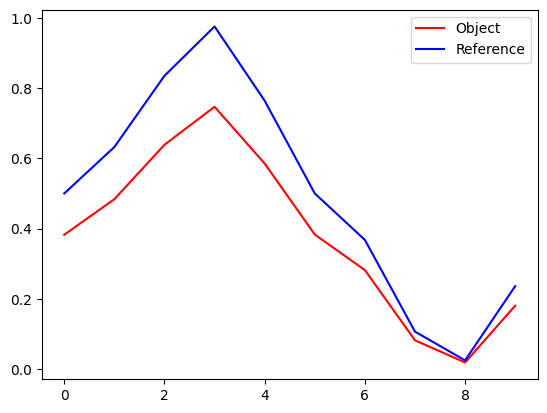

In [7]:
#Rejilla Pi
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.path.abspath(''), os.pardir)))
import src.PCSim.Objects as obj
import matplotlib.pyplot as plt
import numpy as np
import src.PCSim.experiments as experiments
import src.PCSim.Geometry as geom
from src.PCSim.TL_conf import TL_CONFIG
import src.PCSim.source as source
import src.PCSim.detector as detector
import time
start = time.time()

n = 3000

pixel_size = 0.1 # um
FWHM_source =0.1 #um
Spectrum = 'Mono' # Can be 'Mono' or the name of the text file upload in the Spectra folder
Energy = 23 # keV. Just valid if the chosen spectrum is Mono. 35 keV Experimento
Beam_distribution = 'Plane' # Can be 'Plane' or 'Conical' beam
#DSO = 16.69 #Distance source-object in cm, 15 cm Experimento.   16.69 con 23 keV y 6 um de periodo

DSG1 = 16.69 # Distance source-G1 in cm

Period_G1 = 6 #um 6 um Experimento

FWHM_detector = 6
pixel_detector = 1
movable_Grating = 'G2' # The movable grating can be 'G1' or 'G2'
steps =10  # number of steps made by the movable Grating
G1_type = 'phase_pi' #'phase_pi' or 'phase_pi_2'
DC = 0.5



MySource = source.Source((FWHM_source,FWHM_source),Spectrum, Energy, Beam_distribution, pixel_size)

mean_energy = MySource.mean_energy
mean_wavelength = 1.23984193/(mean_energy*1000)

configuration = TL_CONFIG(Design_energy = mean_energy, G1_Period= Period_G1, Movable_Grating = movable_Grating, G1_type = G1_type,TL_multiple = 1, 
                          Number_steps = steps, Step_length = 0.3, pixel_size = pixel_size, resolution = FWHM_detector, pixel_detector = pixel_detector)
Talbot_multiple = configuration.TL_multiple
MyDetector = detector.Detector('Realistic', pixel_detector, FWHM_detector, 'gaussian', pixel_size, gaussian_sigma=0.)

#sample = obj.Sphere(n, radius, pixel_size, material, 0, 0)
#sample = obj.Cylinder(n, outer_radius=200, inner_radius=100,Orientation='Vertical',pixel_size=pixel_size, material='PMMA', DSO = DSG1, x_shift_px=0, y_shift_px=0)
sample= obj.Sphere(n, 100, pixel_size, 'Ca', DSG1, 0, 0)

geometry = geom.Geometry()  
distance, G2Period = geometry.calculate_Talbot_distance_and_G2period(MySource, configuration)
geometry.DSD  = DSG1+distance
configuration.G2_Period = G2Period

G1 = obj.Grating(n , Period_G1, DC, pixel_size, 'Si', DSG1, grating_type = G1_type, design_energy = Energy)

G2 = obj.Grating(n , G2Period, DC, pixel_size, 'Au', DSG1+distance, 100,grating_type = 'custom', design_energy = Energy)
#G1 = obj.Grating(n, Period_G1, DC, pixel_size, 'Si', 0, G1_type, mean_energy)
#G2 = obj.Grating(n, G2Period, DC, pixel_size, 'Au', 0, 'absorption')



i, ir = experiments.Experiment_Phase_Stepping(n, MyDetector, MySource, geometry, [sample], G1, G2, configuration, padding = 0)

#i, ir = experiments.Experiment_Talbot_Lau(n, MyDetector, MySource,geometry, [sample], G1, G2,configuration)
print(f'**** Simulation completed succesfully!! ****')
(z,h, w) = i.shape
plt.plot(i[:, h//2, w//2], label = 'Object', color = 'r')
plt.plot(ir[:, h//2, w//2], label = 'Reference', color = 'b')
plt.legend()
plt.show()

#Retrieval.Compare_Fitt(images_detector, images_detector_reference, pixel_size, G2Period, 300, 300, FFT=False)


# **Save Images as a Tiff stack**

In [4]:
import tifffile
i_stack = np.stack(i, axis =0)
ir_stack = np.stack(ir, axis=0)

tifffile.imwrite('object.tif', i_stack.astype(np.float32), photometric='minisblack')
tifffile.imwrite('ref.tif', ir_stack.astype(np.float32), photometric='minisblack')

# **Phase Retrieval using the Phase-Stepping Method**
During image acquisition, a series of images is obtained while one of the gratings (G1 or G2) is displaced. From these images, the phase and attenuation introduced by the object can be retrieved. In the simple case where the object is homogeneous and its geometry is known, the complex refractive index can also be determined.

The method used is called phase-stepping. It is based on the variation of the intensity of each pixel as one of the gratings is shifted. Due to the detector’s effect, the resulting intensity curve is smoothed and takes the form of a sinusoidal function:
$$I_i = A_i\cdot cos\left(f_i\cdot x+p_i\right)+o_i$$
If the shape of the sinusoid is known, information about the phase and attenuation induced by the object can be extracted. However, it is necessary to compare these measurements with reference images acquired under the same conditions but without the object.

The expressions relating the cosine parameters to the phase and attenuation are as follows:
$$DP_i = p_{i}^{obj}-p_i^{ref}$$
$$a_i = \frac{o_i^{obj}}{o_i^{ref}}$$
$$DF_i = \frac{A_i^{obj}o_i^{ref}}{o_i^{obj}A_i^{ref}}$$

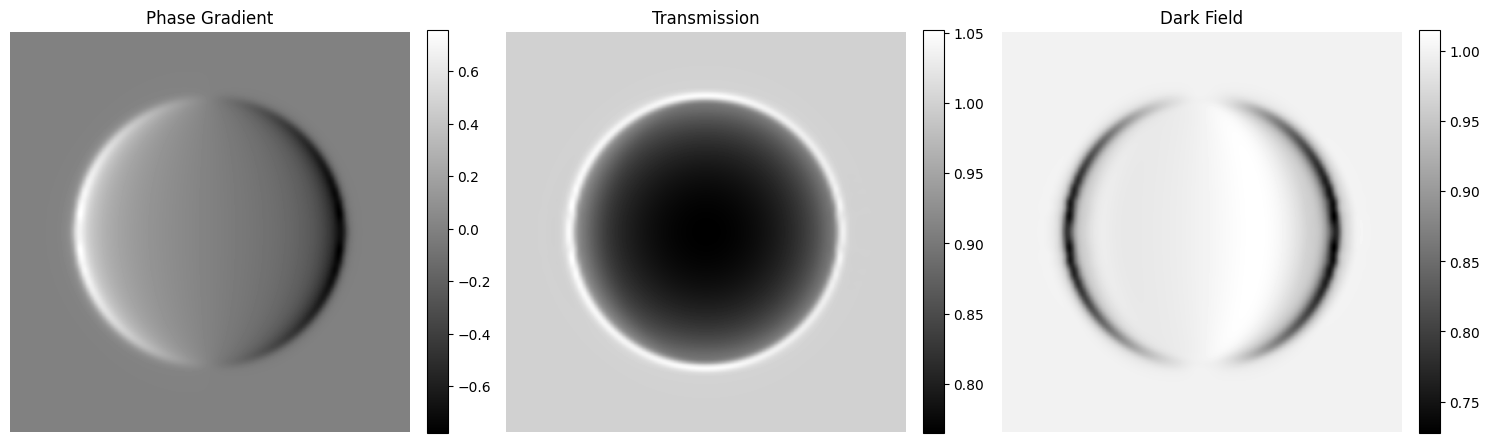

In [8]:
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.path.abspath(''), os.pardir)))

import matplotlib.pyplot as plt
import numpy as np
import src.PCSim.Retrieval as retrieval



PG, Tr, DF = retrieval.DPC_Retrieval(i, ir)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

im0 = axs[0].imshow(PG, cmap='gray')
axs[0].set_title("Phase Gradient")
axs[0].axis('off')
plt.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04)

im1 = axs[1].imshow(Tr, cmap='gray')
axs[1].set_title("Transmission")
axs[1].axis('off')
plt.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)

im2 = axs[2].imshow(DF, cmap='gray')
axs[2].set_title("Dark Field")
axs[2].axis('off')
plt.colorbar(im2, ax=axs[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()
